<a href="https://colab.research.google.com/github/sojeongii/cvcvcv/blob/main/cv_project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 경로 지정


In [2]:
%cd drive/My\ Drive/2022_cv_project
!pwd
!ls -la

/content/drive/My Drive/2022_cv_project
/content/drive/My Drive/2022_cv_project
total 442843
drwx------ 2 root root      4096 May 26 08:36 checkpoints
drwx------ 2 root root      4096 May 26 11:54 cv_project
-rw------- 1 root root     93184 May 27 18:46 cv_project.ipynb
-rw------- 1 root root 453336073 May 25 01:24 cv_project.zip
drwx------ 2 root root      4096 May 26 08:23 CV_TermP
drwx------ 2 root root      4096 May 26 08:23 data
drwx------ 2 root root      4096 May 26 08:55 .ipynb_checkpoints
drwx------ 2 root root      4096 May 26 08:23 model
drwx------ 2 root root      4096 May 26 08:36 outputs
drwx------ 2 root root      4096 May 26 08:36 __pycache__
-rw------- 1 root root      1687 May 26 14:13 test.py
-rw------- 1 root root      4798 May 26 14:14 train.py
-rw------- 1 root root      1327 May 27 15:25 utils.py


# 압축 풀기

In [3]:
import tqdm
import zipfile
import os
import glob

# # 폴더 복사 하기
# import shutil
# shutil.copytree('./cv_project', './cv_project_na')

# # 파일 크기 확인
# filepaths = os.listdir('./cv_project/train')
# print(len(filepaths))
# filepaths = os.listdir('./cv_project/val')
# print(len(filepaths))
# filepaths = os.listdir('./cv_project/mask')
# print(len(filepaths))
# filepaths = os.listdir('./cv_project/hint')
# print(len(filepaths))

# # 압축 풀기
# file_name = 'cv_project'
# !unzip -qq '{file_name}'

# 파일 크기 확인
filepaths = os.listdir('./cv_project/train')
print(len(filepaths))
filepaths = os.listdir('./cv_project/val')
print(len(filepaths))
filepaths = os.listdir('./cv_project/mask')
print(len(filepaths))
filepaths = os.listdir('./cv_project/hint')
print(len(filepaths))

10000
2000
1000
1000


## 더 빠른 GPU

Colab Pro를 사용하여 가장 빠른 GPU에 우선적으로 액세스하세요. Pro+의 경우 더 빠릅니다. 예를 들어 대부분의 표준 Colab 사용자가 속도가 느린 K80 GPU를 수신할 때 Colab Pro 사용자는 T4 또는 P100 GPU를 이용할 수 있습니다. 언제든지 다음 셀을 실행하여 할당된 GPU를 확인할 수 있습니다.

아래 코드 셀의 실행 결과가 ‘Not connected to a GPU’인 경우 메뉴의 런타임 &gt; 런타임 유형 변경에서 런타임을 변경하여 GPU 가속기를 사용 설정한 다음 코드 셀을 다시 실행하면 됩니다.

In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat May 28 02:12:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 추가 메모리

<p>Colab Pro를 구독하면 고용량 메모리 VM에 액세스할 수 있습니다&#40;사용 가능한 경우&#41;. Pro+에는 더 많은 메모리가 제공됩니다. 고용량 메모리 런타임을 사용하도록 노트북 환경설정을 지정하려면 런타임 &gt; '런타임 유형 변경' 메뉴를 선택한 다음 런타임 구성 드롭다운에서 고용량 RAM을 선택하세요.</p>
<p>언제든지 다음 코드 셀을 실행하여 사용 가능한 메모리 용량을 확인할 수 있습니다.</p>
아래 코드 셀의 실행 결과가 ‘Not using a high-RAM runtime’인 경우 메뉴의 런타임 &gt; 런타임 유형 변경에서 고용량 RAM 런타임을 사용 설정하고 런타임 구성 드롭다운에서 고용량 RAM을 선택한 다음 코드 셀을 다시 실행하면 됩니다.

In [5]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# Install pytorch-ssim, mssim
<p> pip install pytorch_msssim </p>
<p> pip install pytorch_ssim </p>

In [6]:
pip install pytorch_ssim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytorch-ssim: filename=pytorch_ssim-0.1-py3-none-any.whl size=2026 sha256=531c5c55c45ce7a8c70d5cdecdf7589fdb032430144e5cb9d5532d2088deb868
  Stored in directory: /root/.cache/pip/wheels/ee/20/09/ebf5e58bdf2560c760074cd140b7f7b0c882e216feabf1ae30
Successfully built pytorch-ssim


In [7]:
pip install pytorch_msssim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Training

device 0 : Tesla P100-PCIE-16GB
train dataset:  10000
validation dataset:  2000
Epoch 1/30
----------


  0%|          | 3/2500 [00:00<05:36,  7.42it/s]

	 Loss 0.0042 (0.0042)	


 20%|██        | 503/2500 [00:49<02:53, 11.53it/s]

	 Loss 0.0101 (0.0094)	


 40%|████      | 1003/2500 [01:33<02:12, 11.30it/s]

	 Loss 0.0074 (0.0093)	


 60%|██████    | 1503/2500 [02:17<01:27, 11.41it/s]

	 Loss 0.0080 (0.0093)	


 80%|████████  | 2003/2500 [03:01<00:43, 11.38it/s]

	 Loss 0.0074 (0.0093)	


100%|██████████| 2500/2500 [03:44<00:00, 11.14it/s]


 train Loss: 0.009 


100%|██████████| 500/500 [00:42<00:00, 11.87it/s]


 valid PSNR AVG : 34.5181 SSIM AVG : 1.0000
 valid Loss: 0.009 
==> best model saved - 0 / 0.009
Epoch 2/30
----------


  0%|          | 3/2500 [00:00<05:34,  7.46it/s]

	 Loss 0.0103 (0.0103)	


 20%|██        | 503/2500 [00:44<02:57, 11.23it/s]

	 Loss 0.0102 (0.0094)	


 40%|████      | 1003/2500 [01:28<02:12, 11.31it/s]

	 Loss 0.0082 (0.0095)	


 60%|██████    | 1503/2500 [02:12<01:27, 11.37it/s]

	 Loss 0.0072 (0.0094)	


 80%|████████  | 2003/2500 [02:56<00:43, 11.54it/s]

	 Loss 0.0099 (0.0094)	


100%|██████████| 2500/2500 [03:39<00:00, 11.36it/s]


 train Loss: 0.009 


100%|██████████| 500/500 [00:41<00:00, 11.92it/s]


 valid PSNR AVG : 33.6514 SSIM AVG : 1.0000
 valid Loss: 0.010 
Epoch 3/30
----------


  0%|          | 3/2500 [00:00<05:43,  7.27it/s]

	 Loss 0.0070 (0.0070)	


 20%|██        | 503/2500 [00:44<02:58, 11.20it/s]

	 Loss 0.0113 (0.0091)	


 40%|████      | 1003/2500 [01:29<02:14, 11.14it/s]

	 Loss 0.0092 (0.0091)	


 60%|██████    | 1503/2500 [02:13<01:29, 11.15it/s]

	 Loss 0.0083 (0.0091)	


 80%|████████  | 2003/2500 [02:56<00:43, 11.40it/s]

	 Loss 0.0099 (0.0091)	


100%|██████████| 2500/2500 [03:40<00:00, 11.32it/s]


 train Loss: 0.009 


100%|██████████| 500/500 [00:41<00:00, 11.92it/s]


 valid PSNR AVG : 33.4829 SSIM AVG : 1.0000
 valid Loss: 0.010 
Epoch 4/30
----------


  0%|          | 3/2500 [00:00<05:36,  7.43it/s]

	 Loss 0.0076 (0.0076)	


 20%|██        | 503/2500 [00:44<02:55, 11.37it/s]

	 Loss 0.0115 (0.0088)	


 40%|████      | 1003/2500 [01:29<02:13, 11.22it/s]

	 Loss 0.0055 (0.0089)	


 60%|██████    | 1503/2500 [02:13<01:28, 11.31it/s]

	 Loss 0.0118 (0.0090)	


 80%|████████  | 2003/2500 [02:57<00:43, 11.48it/s]

	 Loss 0.0104 (0.0090)	


100%|██████████| 2500/2500 [03:41<00:00, 11.31it/s]


 train Loss: 0.009 


100%|██████████| 500/500 [00:42<00:00, 11.64it/s]


 valid PSNR AVG : 34.2683 SSIM AVG : 1.0000
 valid Loss: 0.010 
Epoch 5/30
----------


  0%|          | 3/2500 [00:00<05:44,  7.25it/s]

	 Loss 0.0079 (0.0079)	


 20%|██        | 503/2500 [00:44<02:59, 11.10it/s]

	 Loss 0.0108 (0.0088)	


 40%|████      | 1003/2500 [01:29<02:13, 11.21it/s]

	 Loss 0.0078 (0.0089)	


 60%|██████    | 1503/2500 [02:13<01:27, 11.39it/s]

	 Loss 0.0098 (0.0089)	


 80%|████████  | 2003/2500 [02:57<00:43, 11.32it/s]

	 Loss 0.0069 (0.0090)	


100%|██████████| 2500/2500 [03:41<00:00, 11.29it/s]


 train Loss: 0.009 


100%|██████████| 500/500 [00:42<00:00, 11.79it/s]


 valid PSNR AVG : 32.3307 SSIM AVG : 1.0000
 valid Loss: 0.013 
Epoch 6/30
----------


  0%|          | 3/2500 [00:00<05:39,  7.35it/s]

	 Loss 0.0084 (0.0084)	


 20%|██        | 502/2500 [00:44<02:58, 11.18it/s]

	 Loss 0.0089 (0.0089)	


 40%|████      | 1002/2500 [01:29<02:12, 11.30it/s]

	 Loss 0.0151 (0.0089)	


 60%|██████    | 1502/2500 [02:13<01:27, 11.37it/s]

	 Loss 0.0096 (0.0089)	


 80%|████████  | 2002/2500 [02:57<00:43, 11.33it/s]

	 Loss 0.0064 (0.0089)	


100%|██████████| 2500/2500 [03:41<00:00, 11.30it/s]


 train Loss: 0.009 


100%|██████████| 500/500 [00:42<00:00, 11.72it/s]


 valid PSNR AVG : 34.0120 SSIM AVG : 1.0000
 valid Loss: 0.010 
Epoch 7/30
----------


  0%|          | 3/2500 [00:00<05:39,  7.36it/s]

	 Loss 0.0084 (0.0084)	


 20%|██        | 503/2500 [00:44<02:58, 11.19it/s]

	 Loss 0.0090 (0.0087)	


 40%|████      | 1003/2500 [01:29<02:12, 11.32it/s]

	 Loss 0.0067 (0.0088)	


 60%|██████    | 1503/2500 [02:13<01:28, 11.23it/s]

	 Loss 0.0097 (0.0088)	


 80%|████████  | 2003/2500 [02:57<00:43, 11.43it/s]

	 Loss 0.0077 (0.0088)	


100%|██████████| 2500/2500 [03:40<00:00, 11.33it/s]


 train Loss: 0.009 


100%|██████████| 500/500 [00:41<00:00, 12.00it/s]


 valid PSNR AVG : 33.1415 SSIM AVG : 1.0000
 valid Loss: 0.010 
Epoch 8/30
----------


  0%|          | 2/2500 [00:00<07:00,  5.94it/s]

	 Loss 0.0092 (0.0092)	


 20%|██        | 502/2500 [00:44<02:56, 11.33it/s]

	 Loss 0.0077 (0.0086)	


 40%|████      | 1002/2500 [01:28<02:12, 11.31it/s]

	 Loss 0.0090 (0.0088)	


 60%|██████    | 1502/2500 [02:12<01:27, 11.37it/s]

	 Loss 0.0097 (0.0088)	


 80%|████████  | 2002/2500 [02:56<00:43, 11.48it/s]

	 Loss 0.0124 (0.0088)	


100%|██████████| 2500/2500 [03:39<00:00, 11.37it/s]


 train Loss: 0.009 


100%|██████████| 500/500 [00:42<00:00, 11.77it/s]


 valid PSNR AVG : 34.1199 SSIM AVG : 1.0000
 valid Loss: 0.009 
Epoch 9/30
----------


  0%|          | 3/2500 [00:00<05:31,  7.53it/s]

	 Loss 0.0219 (0.0219)	


 20%|██        | 503/2500 [00:44<02:59, 11.12it/s]

	 Loss 0.0069 (0.0086)	


 40%|████      | 1003/2500 [01:28<02:14, 11.10it/s]

	 Loss 0.0078 (0.0086)	


 60%|██████    | 1503/2500 [02:13<01:28, 11.28it/s]

	 Loss 0.0077 (0.0087)	


 80%|████████  | 2003/2500 [02:57<00:43, 11.42it/s]

	 Loss 0.0076 (0.0086)	


100%|██████████| 2500/2500 [03:40<00:00, 11.32it/s]


 train Loss: 0.009 


100%|██████████| 500/500 [00:40<00:00, 12.24it/s]


 valid PSNR AVG : 34.8532 SSIM AVG : 1.0000
 valid Loss: 0.008 
==> best model saved - 8 / 0.008
Epoch 10/30
----------


  0%|          | 3/2500 [00:00<05:18,  7.85it/s]

	 Loss 0.0095 (0.0095)	


 20%|██        | 503/2500 [00:43<02:55, 11.41it/s]

	 Loss 0.0068 (0.0085)	


 40%|████      | 1003/2500 [01:26<02:09, 11.60it/s]

	 Loss 0.0082 (0.0085)	


 60%|██████    | 1503/2500 [02:09<01:26, 11.47it/s]

	 Loss 0.0090 (0.0085)	


 80%|████████  | 2003/2500 [02:52<00:42, 11.81it/s]

	 Loss 0.0124 (0.0086)	


100%|██████████| 2500/2500 [03:34<00:00, 11.63it/s]


 train Loss: 0.009 


100%|██████████| 500/500 [00:40<00:00, 12.41it/s]


 valid PSNR AVG : 33.6027 SSIM AVG : 1.0000
 valid Loss: 0.010 
Epoch 11/30
----------


  0%|          | 3/2500 [00:00<05:26,  7.66it/s]

	 Loss 0.0074 (0.0074)	


 20%|██        | 503/2500 [00:43<02:57, 11.27it/s]

	 Loss 0.0089 (0.0084)	


 40%|████      | 1003/2500 [01:26<02:08, 11.61it/s]

	 Loss 0.0090 (0.0085)	


 60%|██████    | 1503/2500 [02:10<01:26, 11.55it/s]

	 Loss 0.0095 (0.0085)	


 80%|████████  | 2003/2500 [02:53<00:43, 11.50it/s]

	 Loss 0.0099 (0.0086)	


100%|██████████| 2500/2500 [03:36<00:00, 11.52it/s]


 train Loss: 0.009 


100%|██████████| 500/500 [00:40<00:00, 12.28it/s]


 valid PSNR AVG : 33.1345 SSIM AVG : 1.0000
 valid Loss: 0.011 
Epoch 12/30
----------


  0%|          | 3/2500 [00:00<05:30,  7.56it/s]

	 Loss 0.0067 (0.0067)	


 20%|██        | 503/2500 [00:43<02:52, 11.59it/s]

	 Loss 0.0065 (0.0086)	


 40%|████      | 1003/2500 [01:27<02:10, 11.46it/s]

	 Loss 0.0050 (0.0086)	


 60%|██████    | 1503/2500 [02:10<01:25, 11.60it/s]

	 Loss 0.0063 (0.0085)	


 80%|████████  | 2003/2500 [02:53<00:42, 11.79it/s]

	 Loss 0.0102 (0.0085)	


100%|██████████| 2500/2500 [03:36<00:00, 11.57it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:39<00:00, 12.55it/s]


 valid PSNR AVG : 34.4104 SSIM AVG : 1.0000
 valid Loss: 0.009 
Epoch 13/30
----------


  0%|          | 3/2500 [00:00<05:29,  7.58it/s]

	 Loss 0.0061 (0.0061)	


 20%|██        | 503/2500 [00:43<02:51, 11.64it/s]

	 Loss 0.0062 (0.0084)	


 40%|████      | 1003/2500 [01:27<02:10, 11.51it/s]

	 Loss 0.0075 (0.0085)	


 60%|██████    | 1503/2500 [02:10<01:26, 11.55it/s]

	 Loss 0.0053 (0.0084)	


 80%|████████  | 2003/2500 [02:53<00:42, 11.57it/s]

	 Loss 0.0076 (0.0084)	


100%|██████████| 2500/2500 [03:35<00:00, 11.58it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:39<00:00, 12.53it/s]


 valid PSNR AVG : 35.2596 SSIM AVG : 1.0000
 valid Loss: 0.009 
Epoch 14/30
----------


  0%|          | 3/2500 [00:00<05:28,  7.61it/s]

	 Loss 0.0083 (0.0083)	


 20%|██        | 503/2500 [00:43<02:50, 11.68it/s]

	 Loss 0.0086 (0.0083)	


 40%|████      | 1003/2500 [01:26<02:09, 11.60it/s]

	 Loss 0.0070 (0.0084)	


 60%|██████    | 1503/2500 [02:10<01:26, 11.57it/s]

	 Loss 0.0078 (0.0084)	


 80%|████████  | 2003/2500 [02:52<00:42, 11.67it/s]

	 Loss 0.0071 (0.0084)	


100%|██████████| 2500/2500 [03:35<00:00, 11.61it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:39<00:00, 12.62it/s]


 valid PSNR AVG : 33.6090 SSIM AVG : 1.0000
 valid Loss: 0.010 
Epoch 15/30
----------


  0%|          | 3/2500 [00:00<05:35,  7.45it/s]

	 Loss 0.0110 (0.0110)	


 20%|██        | 503/2500 [00:43<02:50, 11.70it/s]

	 Loss 0.0091 (0.0084)	


 40%|████      | 1003/2500 [01:27<02:07, 11.72it/s]

	 Loss 0.0084 (0.0084)	


 60%|██████    | 1503/2500 [02:10<01:25, 11.60it/s]

	 Loss 0.0068 (0.0084)	


 80%|████████  | 2003/2500 [02:53<00:42, 11.64it/s]

	 Loss 0.0084 (0.0084)	


100%|██████████| 2500/2500 [03:36<00:00, 11.55it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.48it/s]


 valid PSNR AVG : 35.0476 SSIM AVG : 1.0000
 valid Loss: 0.008 
Epoch 16/30
----------


  0%|          | 3/2500 [00:00<05:22,  7.75it/s]

	 Loss 0.0051 (0.0051)	


 20%|██        | 503/2500 [00:43<02:51, 11.68it/s]

	 Loss 0.0166 (0.0084)	


 40%|████      | 1003/2500 [01:26<02:08, 11.61it/s]

	 Loss 0.0099 (0.0083)	


 60%|██████    | 1503/2500 [02:10<01:25, 11.62it/s]

	 Loss 0.0081 (0.0083)	


 80%|████████  | 2003/2500 [02:53<00:42, 11.65it/s]

	 Loss 0.0090 (0.0083)	


100%|██████████| 2500/2500 [03:35<00:00, 11.58it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.37it/s]


 valid PSNR AVG : 34.9514 SSIM AVG : 1.0000
 valid Loss: 0.008 
==> best model saved - 15 / 0.008
Epoch 17/30
----------


  0%|          | 3/2500 [00:00<05:34,  7.46it/s]

	 Loss 0.0046 (0.0046)	


 20%|██        | 503/2500 [00:43<02:51, 11.64it/s]

	 Loss 0.0056 (0.0082)	


 40%|████      | 1003/2500 [01:26<02:09, 11.59it/s]

	 Loss 0.0104 (0.0084)	


 60%|██████    | 1503/2500 [02:09<01:25, 11.71it/s]

	 Loss 0.0099 (0.0083)	


 80%|████████  | 2003/2500 [02:52<00:42, 11.67it/s]

	 Loss 0.0064 (0.0083)	


100%|██████████| 2500/2500 [03:35<00:00, 11.60it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.46it/s]


 valid PSNR AVG : 34.4411 SSIM AVG : 1.0000
 valid Loss: 0.009 
Epoch 18/30
----------


  0%|          | 3/2500 [00:00<05:28,  7.60it/s]

	 Loss 0.0114 (0.0114)	


 20%|██        | 503/2500 [00:43<02:56, 11.34it/s]

	 Loss 0.0062 (0.0083)	


 40%|████      | 1003/2500 [01:27<02:11, 11.41it/s]

	 Loss 0.0096 (0.0082)	


 60%|██████    | 1503/2500 [02:10<01:25, 11.67it/s]

	 Loss 0.0099 (0.0082)	


 80%|████████  | 2003/2500 [02:53<00:42, 11.62it/s]

	 Loss 0.0111 (0.0082)	


100%|██████████| 2500/2500 [03:36<00:00, 11.56it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.50it/s]


 valid PSNR AVG : 34.7549 SSIM AVG : 1.0000
 valid Loss: 0.008 
Epoch 19/30
----------


  0%|          | 3/2500 [00:00<05:41,  7.30it/s]

	 Loss 0.0065 (0.0065)	


 20%|██        | 503/2500 [00:43<02:52, 11.56it/s]

	 Loss 0.0087 (0.0082)	


 40%|████      | 1003/2500 [01:27<02:11, 11.40it/s]

	 Loss 0.0105 (0.0082)	


 60%|██████    | 1503/2500 [02:10<01:26, 11.52it/s]

	 Loss 0.0083 (0.0082)	


 80%|████████  | 2003/2500 [02:53<00:42, 11.76it/s]

	 Loss 0.0065 (0.0082)	


100%|██████████| 2500/2500 [03:36<00:00, 11.56it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:39<00:00, 12.51it/s]


 valid PSNR AVG : 34.8612 SSIM AVG : 1.0000
 valid Loss: 0.008 
Epoch 20/30
----------


  0%|          | 3/2500 [00:00<05:40,  7.34it/s]

	 Loss 0.0090 (0.0090)	


 20%|██        | 503/2500 [00:43<02:53, 11.52it/s]

	 Loss 0.0058 (0.0081)	


 40%|████      | 1003/2500 [01:27<02:09, 11.58it/s]

	 Loss 0.0070 (0.0081)	


 60%|██████    | 1503/2500 [02:10<01:25, 11.67it/s]

	 Loss 0.0082 (0.0081)	


 80%|████████  | 2003/2500 [02:53<00:42, 11.57it/s]

	 Loss 0.0049 (0.0082)	


100%|██████████| 2500/2500 [03:36<00:00, 11.55it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.49it/s]


 valid PSNR AVG : 32.9747 SSIM AVG : 1.0000
 valid Loss: 0.010 
Epoch 21/30
----------


  0%|          | 3/2500 [00:00<05:31,  7.54it/s]

	 Loss 0.0114 (0.0114)	


 20%|██        | 503/2500 [00:43<02:51, 11.65it/s]

	 Loss 0.0065 (0.0083)	


 40%|████      | 1003/2500 [01:27<02:08, 11.65it/s]

	 Loss 0.0089 (0.0082)	


 60%|██████    | 1503/2500 [02:10<01:25, 11.65it/s]

	 Loss 0.0080 (0.0082)	


 80%|████████  | 2003/2500 [02:52<00:42, 11.57it/s]

	 Loss 0.0120 (0.0082)	


100%|██████████| 2500/2500 [03:35<00:00, 11.58it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:39<00:00, 12.52it/s]


 valid PSNR AVG : 34.9765 SSIM AVG : 1.0000
 valid Loss: 0.008 
Epoch 22/30
----------


  0%|          | 3/2500 [00:00<05:32,  7.51it/s]

	 Loss 0.0096 (0.0096)	


 20%|██        | 503/2500 [00:43<02:57, 11.28it/s]

	 Loss 0.0100 (0.0082)	


 40%|████      | 1003/2500 [01:26<02:11, 11.35it/s]

	 Loss 0.0089 (0.0081)	


 60%|██████    | 1503/2500 [02:10<01:26, 11.52it/s]

	 Loss 0.0050 (0.0080)	


 80%|████████  | 2003/2500 [02:53<00:42, 11.69it/s]

	 Loss 0.0085 (0.0081)	


100%|██████████| 2500/2500 [03:36<00:00, 11.57it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.37it/s]


 valid PSNR AVG : 34.3759 SSIM AVG : 1.0000
 valid Loss: 0.009 
Epoch 23/30
----------


  0%|          | 3/2500 [00:00<05:24,  7.69it/s]

	 Loss 0.0112 (0.0112)	


 20%|██        | 503/2500 [00:43<02:51, 11.61it/s]

	 Loss 0.0059 (0.0080)	


 40%|████      | 1003/2500 [01:26<02:12, 11.34it/s]

	 Loss 0.0136 (0.0080)	


 60%|██████    | 1503/2500 [02:10<01:26, 11.50it/s]

	 Loss 0.0128 (0.0080)	


 80%|████████  | 2003/2500 [02:53<00:42, 11.66it/s]

	 Loss 0.0063 (0.0080)	


100%|██████████| 2500/2500 [03:35<00:00, 11.57it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:39<00:00, 12.59it/s]


 valid PSNR AVG : 34.8617 SSIM AVG : 1.0000
 valid Loss: 0.008 
==> best model saved - 22 / 0.008
Epoch 24/30
----------


  0%|          | 3/2500 [00:00<05:28,  7.61it/s]

	 Loss 0.0085 (0.0085)	


 20%|██        | 503/2500 [00:43<02:52, 11.54it/s]

	 Loss 0.0083 (0.0080)	


 40%|████      | 1003/2500 [01:27<02:08, 11.63it/s]

	 Loss 0.0095 (0.0080)	


 60%|██████    | 1503/2500 [02:10<01:28, 11.32it/s]

	 Loss 0.0127 (0.0080)	


 80%|████████  | 2003/2500 [02:53<00:42, 11.76it/s]

	 Loss 0.0067 (0.0080)	


100%|██████████| 2500/2500 [03:36<00:00, 11.54it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.48it/s]


 valid PSNR AVG : 34.8341 SSIM AVG : 1.0000
 valid Loss: 0.008 
Epoch 25/30
----------


  0%|          | 3/2500 [00:00<05:27,  7.63it/s]

	 Loss 0.0081 (0.0081)	


 20%|██        | 503/2500 [00:43<02:51, 11.63it/s]

	 Loss 0.0092 (0.0079)	


 40%|████      | 1003/2500 [01:26<02:08, 11.62it/s]

	 Loss 0.0093 (0.0080)	


 60%|██████    | 1503/2500 [02:10<01:27, 11.41it/s]

	 Loss 0.0076 (0.0080)	


 80%|████████  | 2003/2500 [02:53<00:42, 11.62it/s]

	 Loss 0.0068 (0.0081)	


100%|██████████| 2500/2500 [03:36<00:00, 11.57it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.47it/s]


 valid PSNR AVG : 35.1267 SSIM AVG : 1.0000
 valid Loss: 0.008 
==> best model saved - 24 / 0.008
Epoch 26/30
----------


  0%|          | 3/2500 [00:00<05:24,  7.69it/s]

	 Loss 0.0084 (0.0084)	


 20%|██        | 503/2500 [00:43<02:53, 11.53it/s]

	 Loss 0.0061 (0.0080)	


 40%|████      | 1003/2500 [01:27<02:09, 11.57it/s]

	 Loss 0.0094 (0.0080)	


 60%|██████    | 1503/2500 [02:10<01:26, 11.49it/s]

	 Loss 0.0098 (0.0080)	


 80%|████████  | 2003/2500 [02:53<00:43, 11.52it/s]

	 Loss 0.0097 (0.0080)	


100%|██████████| 2500/2500 [03:36<00:00, 11.56it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.41it/s]


 valid PSNR AVG : 35.1912 SSIM AVG : 1.0000
 valid Loss: 0.008 
==> best model saved - 25 / 0.008
Epoch 27/30
----------


  0%|          | 3/2500 [00:00<05:25,  7.68it/s]

	 Loss 0.0060 (0.0060)	


 20%|██        | 503/2500 [00:43<02:52, 11.61it/s]

	 Loss 0.0060 (0.0081)	


 40%|████      | 1003/2500 [01:27<02:09, 11.59it/s]

	 Loss 0.0066 (0.0080)	


 60%|██████    | 1503/2500 [02:10<01:26, 11.57it/s]

	 Loss 0.0089 (0.0081)	


 80%|████████  | 2003/2500 [02:53<00:43, 11.54it/s]

	 Loss 0.0045 (0.0080)	


100%|██████████| 2500/2500 [03:36<00:00, 11.54it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.48it/s]


 valid PSNR AVG : 35.0709 SSIM AVG : 1.0000
 valid Loss: 0.008 
Epoch 28/30
----------


  0%|          | 3/2500 [00:00<05:32,  7.51it/s]

	 Loss 0.0104 (0.0104)	


 20%|██        | 503/2500 [00:43<02:53, 11.51it/s]

	 Loss 0.0068 (0.0079)	


 40%|████      | 1003/2500 [01:27<02:10, 11.45it/s]

	 Loss 0.0050 (0.0079)	


 60%|██████    | 1503/2500 [02:11<01:29, 11.13it/s]

	 Loss 0.0094 (0.0080)	


 80%|████████  | 2003/2500 [02:54<00:43, 11.50it/s]

	 Loss 0.0079 (0.0080)	


100%|██████████| 2500/2500 [03:37<00:00, 11.50it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.35it/s]


 valid PSNR AVG : 35.4188 SSIM AVG : 1.0000
 valid Loss: 0.008 
==> best model saved - 27 / 0.008
Epoch 29/30
----------


  0%|          | 3/2500 [00:00<06:04,  6.85it/s]

	 Loss 0.0067 (0.0067)	


 20%|██        | 503/2500 [00:43<02:52, 11.55it/s]

	 Loss 0.0136 (0.0078)	


 40%|████      | 1003/2500 [01:27<02:11, 11.39it/s]

	 Loss 0.0105 (0.0080)	


 60%|██████    | 1503/2500 [02:11<01:26, 11.50it/s]

	 Loss 0.0070 (0.0079)	


 80%|████████  | 2003/2500 [02:54<00:42, 11.57it/s]

	 Loss 0.0067 (0.0080)	


100%|██████████| 2500/2500 [03:37<00:00, 11.50it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:40<00:00, 12.42it/s]


 valid PSNR AVG : 35.3281 SSIM AVG : 1.0000
 valid Loss: 0.008 
==> best model saved - 28 / 0.008
Epoch 30/30
----------


  0%|          | 3/2500 [00:00<05:25,  7.67it/s]

	 Loss 0.0078 (0.0078)	


 20%|██        | 503/2500 [00:44<03:00, 11.05it/s]

	 Loss 0.0093 (0.0078)	


 40%|████      | 1003/2500 [01:27<02:12, 11.30it/s]

	 Loss 0.0061 (0.0079)	


 60%|██████    | 1503/2500 [02:11<01:26, 11.54it/s]

	 Loss 0.0056 (0.0080)	


 80%|████████  | 2003/2500 [02:54<00:42, 11.64it/s]

	 Loss 0.0083 (0.0080)	


100%|██████████| 2500/2500 [03:36<00:00, 11.53it/s]


 train Loss: 0.008 


100%|██████████| 500/500 [00:39<00:00, 12.68it/s]


 valid PSNR AVG : 34.9121 SSIM AVG : 1.0000
 valid Loss: 0.008 
Training complete in 129m 16s
Best valid Acc: 28 - 0.0080


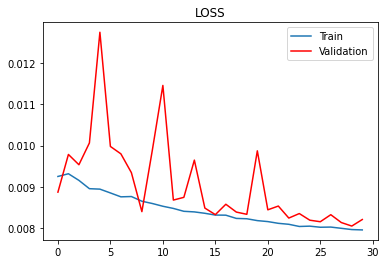

In [10]:
import os
from data.dataset import ColorHintDataset
import torch.utils.data as data
import torch
import cv2
import tqdm
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
from data.transform import tensor2im
from model.res_unet.res_unet import ResUnet
from model.res_unet.res_unet_plus import ResUnetPlusPlus
from model.res_unet.unet import UNet
# from model.att_unet.att_unet import Unet
import matplotlib.image as img
import copy, time
from model.res_unet.ra_unet import ResAttdUNet
from utils import AverageMeter, SSIM, psnr, save_img
from torchsummary import summary

device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"
  print('device 0 :', torch.cuda.get_device_name(0))


def main():
    # Change to your data root directory
    root_path = "./cv_project"

    check_path = './checkpoints/'
    # Depend on runtime setting
    use_cuda = True

    # make the directory
    os.makedirs('./checkpoints/', exist_ok=True)
    os.makedirs('./outputs/', exist_ok=True)
    os.makedirs('./outputs/test', exist_ok=True)
    os.makedirs('./outputs/GroundTruth', exist_ok=True)
    os.makedirs('./outputs/Hint', exist_ok=True)
    os.makedirs('./outputs/Output', exist_ok=True)
    os.makedirs('./checkpoints', exist_ok=True)

    # Load the data
    train_dataset = ColorHintDataset(root_path, 256, "train")
    val_dataset = ColorHintDataset(root_path, 256, "val")

    dataloaders = {}
    dataloaders['train'] = torch.utils.data.DataLoader(train_dataset, batch_size=4, num_workers = 2, shuffle=True)
    dataloaders['valid'] = torch.utils.data.DataLoader(val_dataset, batch_size=4, num_workers = 2, shuffle=False)


    print('train dataset: ', len(train_dataset))
    print('validation dataset: ', len(val_dataset))


    # Select the model
    models = {'ResUnet': ResUnet(3), 'ResUnetPlusPlus': ResUnetPlusPlus(3), 'UNet': UNet(), 'ResAttdUnet' : ResAttdUNet()}
    model = ResAttdUNet().to(device)

    # load the model
    model.load_state_dict(torch.load('./checkpoints/model-epoch-29-losses-0.00843.pth'))

    criterion = torch.nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
    # summary(model, (3, 256, 256))

    lmbda = lambda epoch : 0.95
    exp_lr_scehduler = optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lmbda)
    epochs = 30

    # initialize the
    since = time.time()
    train_loss, train_acc, valid_loss, valid_acc = [], [], [], []
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 999
    for epoch in range(epochs):
        print('Epoch {}/{}'.format(epoch + 1, epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            losses = AverageMeter()
            psnr_total = 0
            ssim_total = 0
            count = 0

            # Iterate over data.
            for i, data in enumerate(tqdm.tqdm(dataloaders[phase])):
                if use_cuda:
                    l = data["l"].to(device)
                    ab = data["ab"].to(device)
                    hint = data["hint"].to(device)
                else:
                    l = data["l"]
                    ab = data["ab"]
                    hint = data["hint"]

                gt_image = torch.cat((l, ab), dim=1)
                hint_image = torch.cat((l, hint), dim=1)
                hint_image = hint_image.float().to(device)
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(hint_image)
                    loss = criterion(outputs, ab)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        # zero the parameter gradients
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                losses.update(loss.item(), hint_image.size(0))

                if phase == 'train':
                  if i % 500 == 0:
                    print('\t Loss {loss.val:.4f} ({loss.avg:.4f})\t'.format(loss=losses))
                
                else:
                  outputs = torch.cat((l, outputs), dim = 1)
                  out_hint_np = tensor2im(outputs)
                  out_hint_bgr = cv2.cvtColor(out_hint_np, cv2.COLOR_LAB2BGR)

                  hint_np = tensor2im(hint_image)
                  hint_bgr = cv2.cvtColor(hint_np, cv2.COLOR_LAB2BGR)

                  gt_np = tensor2im(gt_image)
                  gt_bgr = cv2.cvtColor(gt_np, cv2.COLOR_LAB2BGR)
                  psnr, ssim = save_img(gt_bgr, hint_bgr, out_hint_bgr, i)
                  psnr_total += psnr
                  ssim_total += ssim

            if phase == 'train':
                exp_lr_scehduler.step()
                train_loss.append(losses.avg)

            else:
                print(' {} PSNR AVG : {:.4f} SSIM AVG : {:.4f}'.format(phase, psnr_total/len(dataloaders[phase]), ssim_total/len(dataloaders[phase])))
                valid_loss.append(losses.avg)

            print(' {} Loss: {:.3f} '.format(phase, losses.avg))

            # deep copy the model
            if phase == 'valid' and losses.avg < best_loss:
                best_idx = epoch
                best_loss = losses.avg
                best_model_wts = copy.deepcopy(model.state_dict())

                # Save model & checkpoint
                torch.save(model.state_dict(), './checkpoints/model-epoch-{}-losses-{:.5f}.pth'.format(epoch + 1, best_loss))

                print('==> best model saved - %d / %.3f' % (best_idx, best_loss))

    # Training Result
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best valid Acc: %d - %.4f' % (best_idx, best_loss))


    # Plot the training procedure
    epoch_axis = np.arange(0, epochs)
    plt.figure()
    plt.title('LOSS')
    plt.plot(epoch_axis, train_loss, epoch_axis, valid_loss, 'r-')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

if __name__ == '__main__':
    main()

# Test & Predict

In [9]:
from data.dataset import ColorHintDataset
import torch
import torch.utils.data as data
import cv2
import tqdm
import os
from data.dataset import tensor2im
from model.res_unet.res_unet import ResUnet
from model.res_unet.res_unet_plus import ResUnetPlusPlus
from model.res_unet.unet import UNet
from model.att_unet.att_unet import Unet
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"
  print('device 0 :', torch.cuda.get_device_name(0))
  
def main():
    # Change to your data root directory
    root_path = "./cv_project"

    # Depend on runtime setting
    use_cuda = True

    test_dataset = ColorHintDataset(root_path, 256, 'test')

    dataloaders = {}
    dataloaders['test'] = torch.utils.data.DataLoader(test_dataset, batch_size = 1, shuffle=False)
    print('test dataset: ', len(test_dataset))


    # state_dict = torch.load(check_point)
    model = Unet().to(device)
    # model.load_state_dict(torch.load('./checkpoints/model-epoch-2-losses-0.01331.pth'))

    os.makedirs('outputs/test', exist_ok=True)

    model.eval()
    for i, data in enumerate(tqdm.tqdm(dataloaders['test'])):
        if use_cuda:
            l = data["l"].to(device)
            hint = data["hint"].to(device)
            file_name = data["file_name"][0]

        hint_image = torch.cat((l, hint), dim=1)
        hint_np = tensor2im(hint_image)
        hint_image = hint_image.float().to(device)

        output = model(hint_image).squeeze(1)
        output = torch.cat((l, output), dim = 1)
        out_hint_np = tensor2im(output)


        hint_bgr = cv2.cvtColor(hint_np, cv2.COLOR_LAB2BGR)
        out_hint_bgr = cv2.cvtColor(out_hint_np, cv2.COLOR_LAB2BGR)


        plt.figure(1)
        cv2_imshow(hint_bgr)
        plt.figure(2)
        cv2_imshow(out_hint_bgr)

        input()
        
        # 사진 저장
        # fname = str(file_name).replace("['", '')
        # fname = fname.replace("']", '')

        # cv2.imwrite("outputs/test/"+fname, out_hint_bgr)

if __name__ == '__main__':
    main()

ImportError: ignored

# Predict - 얘 안써도 될ㅡ

In [ ]:
from data.dataset import ColorHintDataset
import torch
import torch.utils.data as data
import cv2
import tqdm
import os
from data.transform import tensor2im
from model.res_unet.res_unet import ResUnet
from model.res_unet.res_unet_plus import ResUnetPlusPlus
from model.res_unet.unet import UNet
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pylab
from test import test

def main():
    ## calculate and save psnr, ssim ##
    with torch.no_grad():
      test()
    # change to your Output data directory
    output_path = "./outputs/Output"
    file_list = os.listdir(output_path)

    ssim = np.zeros(len(file_list))
    psnr = np.zeros(len(file_list))

    for i, img_name in enumerate(file_list):
        # print(img_name)
        name = img_name.replace('.png', '')   # remove '.png'
        temp = name.split('_')
        ssim[i] += float(temp[1].replace('ssim:', ''))
        psnr[i] += float(temp[2].replace('psnr:', ''))

    ssim_avg = sum(ssim)/len(ssim)
    psnr_avg = sum(psnr)/len(psnr)

    print('Average of ssim: {}'.format(ssim_avg))
    print('Average of psnr: {}'.format(psnr_avg))

    np.save(os.path.join('./', 'ssim.npy'), ssim)
    np.save(os.path.join('./', 'psnr.npy'), psnr)

    # plot and save ssim curve
    plt.figure()
    plt.title('ssim')
    pylab.xlim(0, len(file_list) + 1)
    pylab.ylim(0, 1.1)
    plt.plot(range(1, len(file_list) + 1), ssim, label='ssim')
    plt.legend()
    plt.savefig(os.path.join('./', 'ssim.pdf'))
    plt.show()
    plt.close()

    # plot and save psnr curve
    plt.figure()
    plt.title('pnsr')
    pylab.xlim(0, len(file_list) + 1)
    pylab.ylim(0, 100)
    plt.plot(range(1, len(file_list) + 1), psnr, label='psnr')
    plt.legend()
    plt.savefig(os.path.join('./', 'psnr.pdf'))
    plt.show()
    plt.close()

if __name__ == '__main__':
    main()